
# YELP 서비스의 리뷰 분석 (NLP)




# PROBLEM STATEMENT

- stars 컬럼은, 유저가 1점부터 5점까지 준 별점이 들어있다.
- text 컬럼은, 별점을 준 유저의 리뷰가 들어있다. 
- cool, useful, funny 컬럼은, 다른사람들이 이 리뷰 글에 투표한 숫자다. 따라서 쿨이 3개이면, 이 리뷰에 대해서 3명이 쿨에 공감했다는 뜻이다.

# STEP #0: LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# STEP #1: IMPORT DATASET

### yelp.csv 파일을 읽어서, yelp_df 변수에 저장하고, 기본적인 통계 분석을 하시오.

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/data-vision/day11')

In [ ]:
yelp_df =  pd.read_csv('yelp.csv')

In [ ]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


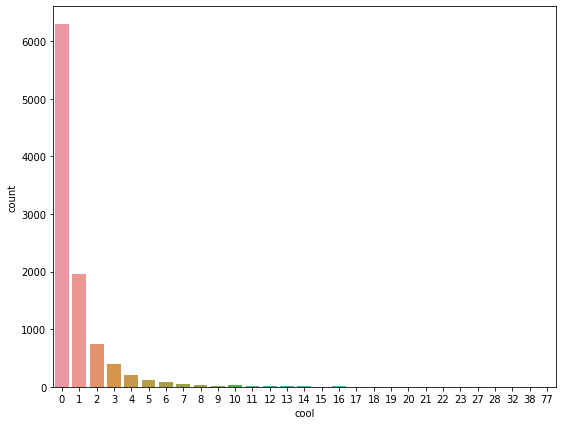

In [ ]:
plt.figure(figsize=(9,7))
sb.countplot(data=yelp_df, x='cool')
plt.show()

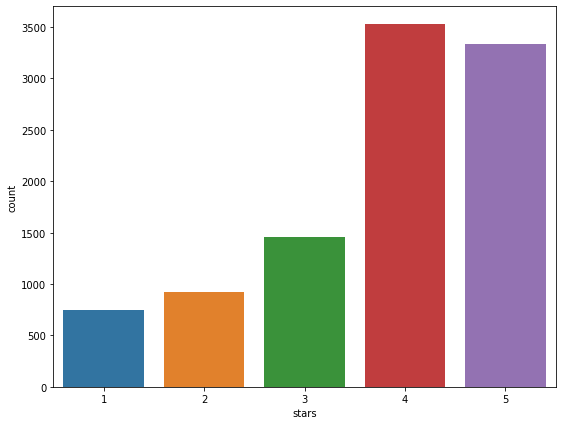

In [ ]:
plt.figure(figsize=(9,7))
sb.countplot(data=yelp_df, x='stars')
plt.show()

# STEP #2: VISUALIZE DATASET

### 리뷰 데이터의 길이를 구하여, 새로운 컬럼 length 컬럼을 만드시오

In [ ]:
yelp_df.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [ ]:
yelp_df['length'] = yelp_df.text.apply(len)

### 리뷰의 length를 히스토그램으로 나타내시오.  

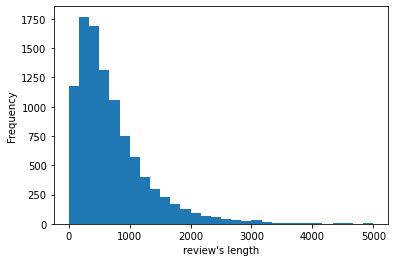

In [ ]:
yelp_df['length'].plot(kind='hist', bins=30)
plt.xlabel('review\'s length')
plt.show()

### 리뷰가 가장 긴 글을 찾아서, 리뷰 내용을 보여주세요.

In [ ]:
yelp_df.describe()

,stars,cool,useful,funny,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [ ]:
yelp_df.loc [ yelp_df.length == yelp_df.length.max(), 'text'].values

array(['In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I

In [ ]:
#위에서 values를 해보면 array[]로 되어 있으니 [0]인덱스로 또 접근할 수 있다
yelp_df.loc [ yelp_df.length == yelp_df.length.max(), 'text'].values[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

### 리뷰가 가장 짧은 리뷰는 총 몇개이며, 리뷰 내용은 무엇입니까?

In [ ]:
yelp_df.loc[ yelp_df.length == yelp_df.length.min() , 'text']

6450    X
Name: text, dtype: object

In [ ]:
yelp_df.length.value_counts()

528     20
133     19
323     19
320     19
129     18
        ..
1513     1
1652     1
1660     1
1684     1
2049     1
Name: length, Length: 2134, dtype: int64

### 별점은 1점부터 5점까지 입니다. 각 별점별로 리뷰가 몇개씩 있는지를 시각화 하시오.

In [ ]:
#df_sorted_byStar = yelp_df.stars.value_counts()

In [ ]:
#df_sorted_byStar.index

Int64Index([4, 5, 3, 2, 1], dtype='int64')

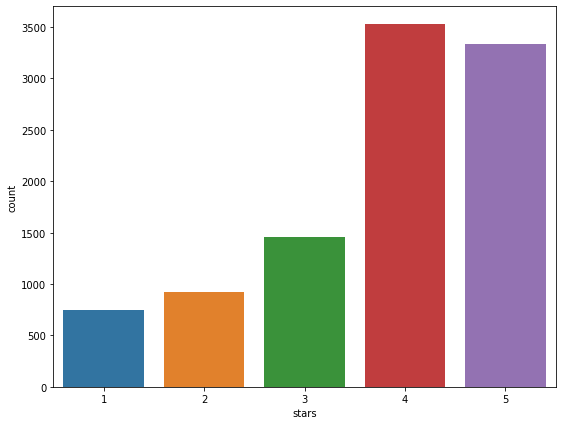

In [ ]:
plt.figure(figsize=(9,7))
sb.countplot(data=yelp_df, x='stars')
plt.show()

### 별점별로 리뷰가 몇개씩 있는지 시각화 하되, 내림차순으로 정렬하여 시각화 하시오.

In [ ]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [ ]:
my_index = yelp_df.stars.value_counts().index

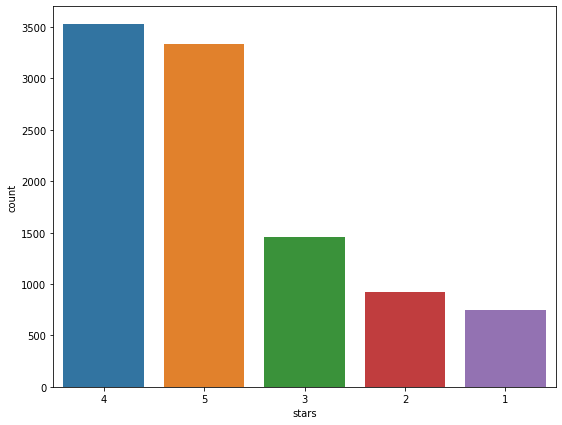

In [ ]:
plt.figure(figsize=(9,7))
sb.countplot(data=yelp_df, x='stars', order=my_index)
plt.show()

### 별점이 1점인 리뷰의 데이터프레임과, 별점아 5점인 데이터프레임을 각각 따로 아래의 변수에 저장하시오.
### 변수명은 yelp_df_1 , yelp_df_5 로 저장하시오.

In [ ]:
yelp_df_1 = yelp_df.loc[ yelp_df.stars == 1, ]

In [ ]:
yelp_df_5 = yelp_df.loc[ yelp_df.stars == 5, ]

In [ ]:
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


### yelp_df_1 , yelp_df_5 두개의 데이터프레임을 하나로 합치시오.  긍정과 부정의 리뷰 학습을 위해서 하나로 합치는 것이다.

In [ ]:
yelp_df_1.shape

(749, 11)

In [ ]:
yelp_df_5.shape

(3337, 11)

pd.concat() 복습


In [ ]:
# 별점은 2, 3, 4점은 빼서 1, 5점만은 부정, 긍정으로 만드는게 목적
# merge는 데이터 row 가 같아야 한다
#pd.merge(yelp_df_1, yelp_df_5) --> row도 같아야 함
#pd.concat() ---> 컬럼이 같을 때 위아래도 붙여줌
#pd.join()  
yelp_df_1_5 =  pd.concat([yelp_df_1, yelp_df_5])

In [ ]:
yelp_df_1_5.drop(['business_id', 'date',  'review_id','type', 'user_id' ], axis=1, inplace=True )

### 별점 1과 별점 5의 리뷰는 몇개씩인지, 시각화 하시오.

In [ ]:
yelp_df_1_5.head()

,stars,text,cool,useful,funny,length
23,1,U can go there n check the car out. If u wanna...,0,1,1,594
31,1,Disgusting! Had a Groupon so my daughter and ...,0,1,0,361
35,1,"I've eaten here many times, but none as bad as...",0,4,3,1198
61,1,I have always been a fan of Burlington's deals...,0,0,0,569
64,1,Another night meeting friends here. I have to...,0,1,2,498


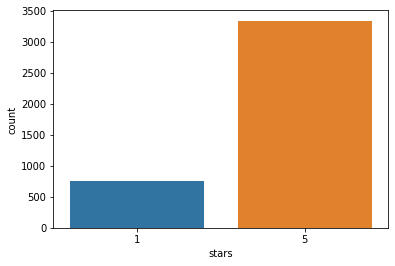

In [ ]:
# 이렇게 차이가 크면 학습이 잘 안나올 수 있다고 한다
sb.countplot(data=yelp_df_1_5, x='stars')
plt.show()

### 별점 1점과 별점 5점의 리뷰의 비율이 나오도록, 파이차트로 시각화 하시오.

In [ ]:
pie_star_1_5 = yelp_df_1_5.stars.value_counts()

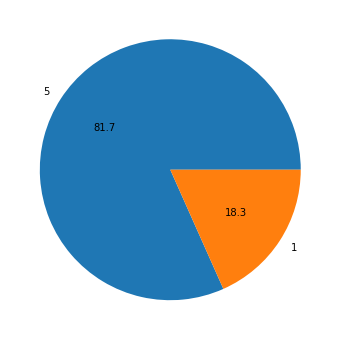

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(pie_star_1_5, autopct='%.1f', labels=pie_star_1_5.index)
plt.show()

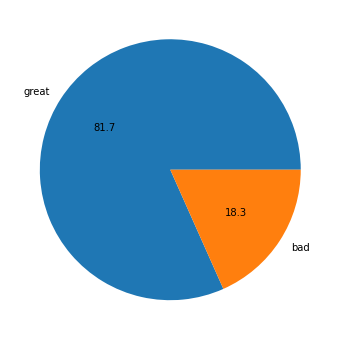

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(pie_star_1_5, autopct='%.1f', labels=['great', 'bad'])
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 Punctuation (구두점) 제거

In [ ]:
yelp_df.drop(['business_id', 'date',  'review_id','type', 'user_id' ], axis=1, inplace=True )

In [ ]:
import string as st

In [ ]:
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# STEP 3.2 STOPWORDS (불용어) 제거

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopList = stopwords.words('english')

In [ ]:
# 테스트용 문장
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [ ]:
def msg_cleaning(message):
  punc_removed = [ char for char in message if char not in st.punctuation ]
  punc_removed_join = ''.join(punc_removed)
  punc_removed_join_clean = [ word for word in punc_removed_join.split() if word.lower() not in stopList ]

  return punc_removed_join_clean

In [ ]:
test = msg_cleaning(mini_challenge)

# STEP 3.3 COUNT VECTORIZER 를 사용하여, 문자를 숫자로 바꿔준다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit_transform(test)

<6x6 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names()

['challenge', 'mini', 'punctuations', 'remove', 'stopwords', 'teach']

# 정리 : 위의 과정을 하나의 함수로 만든다.

### yelp_df_1_5 데이터프레임의 text 컬럼에, 클리닝 함수를 적용한다.

In [ ]:
yelp_df_clean = yelp_df_1_5.text.apply(msg_cleaning)

In [ ]:
yelp_df_clean

(4086,)

# COUNT VECTORIZER 에 클리닝 함수를 애널라이저로 적용하여, 단어를 숫자로 바꾼다.

In [ ]:
vectorizer = CountVectorizer( analyzer = msg_cleaning)

In [ ]:
vectorized_yelp_1_5 = vectorizer.fit_transform(yelp_df_1_5.text)


In [ ]:
X = vectorized_yelp_1_5

In [ ]:
y = yelp_df_1_5['stars']

# STEP#4: 학습용과 테스트용으로 데이터프레임을 나눈다. 테스트용은 20%로 설정한다. 그리고 나이브베이즈 모델링 한다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_yelp_1_5, y, test_size=0.2, random_state=10042)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier = MultinomialNB()

In [ ]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = classifier.predict(X_test)

# STEP#5: 테스트셋으로 모델 평가. 컨퓨전 매트릭스 사용한다.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[117,  53],
       [ 26, 622]])

In [ ]:
(117+622) / cm.sum()

0.9034229828850856

# STEP#6 다음 문장이 긍정인지 부정인지 예측하시오.


### 1. 'amazing food! highly recommmended'
### 2. 'shit food, made me sick'

In [ ]:
test1 = [ 'amazing food! highly recommmended']

In [ ]:
test_countvectorizer = vectorizer.transform(test1)
test_predict = classifier.predict(test_countvectorizer)
test_predict

array([5])

In [ ]:
test2 = ['shit food, made me sick']
test_countvectorizer2 = vectorizer.transform(test2)
test_predict2 = classifier.predict(test_countvectorizer2)
test_predict2

array([5])